In [5]:
import matplotlib.pyplot as plt
from pymatgen.core import Lattice, Structure
from pymatgen.core.periodic_table import Element
import numpy as np

# Define lattice parameters for amphibole structure
a = 9.775
b = 18.2
c = 5.298
alpha = 90
beta = 105.8
gamma = 90

# Create a lattice
lattice = Lattice.from_parameters(a, b, c, alpha, beta, gamma)

# Basis atoms and their positions based on the provided site values
basis = [
    (Element("Si"), [0.675, 0.333, 0.25]),    # T(Si)
    (Element("Al"), [0.675, 0.167, 0.75]),    # T(Al)
    (Element("Ti"), [0.325, 0.667, 0.75]),    # T(Ti)
    (Element("Al"), [0.325, 0.833, 0.25]),    # C(Al)
    (Element("Ti"), [0.875, 0.167, 0.75]),    # C(Ti)
    (Element("Cr"), [0.525, 0.667, 0.75]),    # C(Cr)
    (Element("Ni"), [0.525, 0.833, 0.25]),    # C(Ni)
    (Element("Mg"), [0.875, 0.333, 0.25]),    # C(Mg)
    (Element("Fe"), [0.099, 0.487, 0.744]),   # C(Fe2+)
    (Element("Li"), [0.219, 0.053, 0.677]),   # C(Li)
    (Element("Mn"), [0.781, 0.633, 0.222]),   # B(Mn2+)
    (Element("Fe"), [0.901, 0.199, 0.155]),   # B(Fe2+)
    (Element("Ca"), [0.391, 0.005, 0.583]),   # B(Ca)
    (Element("Na"), [0.605, 0.495, 0.389]),   # B(Na)
    (Element("K"), [0.095, 0.809, 0.000]),    # A(K)
    (Element("O"), [0.809, 0.881, 0.512]),    # W(OH)
    (Element("F"), [0.693, 0.609, 0.485]),    # W(F)
    (Element("Cl"), [0.307, 0.119, 0.001]),   # W(Cl)
    (Element("O"), [0.315, 0.391, 0.985])     # W(O2-)
]

# Ionic radii for the elements
ionic_radii = {
    "Si": 0.26,
    "Al": 0.39,
    "Ti": 0.61,
    "Cr": 0.62,
    "Ni": 0.69,
    "Mg": 0.72,
    "Fe": 0.78,
    "Li": 0.76,
    "Mn": 0.81,
    "Ca": 1.00,
    "Na": 1.02,
    "K": 1.38,
    "O": 1.40,
    "F": 1.33,
    "Cl": 1.81
}

# Scale factor for visualizing ionic radii
scale_factor = 100

# Create a Structure object
structure = Structure(lattice, [atom[0] for atom in basis], [atom[1] for atom in basis])

# Project the 3D coordinates to 2D by ignoring the z-coordinate
projected_coords = [(site.coords[0], site.coords[1]) for site in structure]
elements = [site.specie.symbol for site in structure]

# Visualization using matplotlib
fig, ax = plt.subplots()

# Define colors for elements
colors = {
    "Si": "orange",
    "Al": "orange",
    "Ti": "orange",
    "Cr": "green",
    "Ni": "green",
    "Mg": "green",
    "Fe": "green",
    "Li": "green",
    "Mn": "pink",
    "Ca": "pink",
    "Na": "pink",
    "K": "magenta",
    "O": "blue",
    "F": "blue",
    "Cl": "blue"
}

# Plot the atoms with sizes proportional to their ionic radii
for (x, y), element in zip(projected_coords, elements):
    size = ionic_radii[element] * scale_factor
    ax.scatter(x, y, color=colors[element], s=size, label=element)

# Define tetrahedrons by connecting elements
tetrahedrons = [
    [projected_coords[0], projected_coords[8], projected_coords[9], projected_coords[10]],  # Example tetrahedron
    [projected_coords[1], projected_coords[8], projected_coords[9], projected_coords[11]]   # Example tetrahedron
]

for tetra in tetrahedrons:
    vertices = np.array(tetra)
    for i in range(len(vertices)):
        for j in range(i+1, len(vertices)):
            ax.plot(*zip(vertices[i], vertices[j]), color='r')

# Create a unique legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right', bbox_to_anchor=(1.2, 1))

# Set the aspect ratio
ax.set_aspect('equal')

# Set the labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Remove the grid
ax.grid(False)

plt.show()



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/tomassalazar/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/tomassalazar/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/tomassalazar/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/tomassalazar/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in la

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

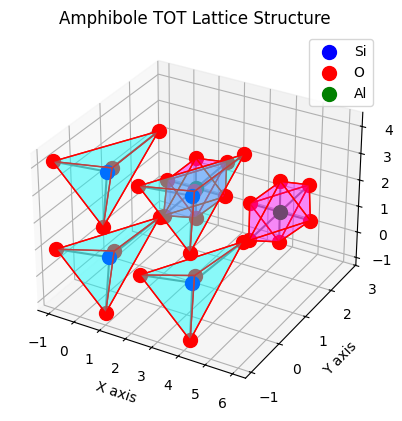

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def create_tetrahedron(center, bond_length):
    O_atoms = bond_length * np.array([
        [1, 1, 1],
        [-1, -1, 1],
        [-1, 1, -1],
        [1, -1, -1]
    ]) / np.sqrt(3) + center
    return center, O_atoms

def create_octahedron(center, bond_length):
    O_atoms = bond_length * np.array([
        [1, 0, 0],
        [-1, 0, 0],
        [0, 1, 0],
        [0, -1, 0],
        [0, 0, 1],
        [0, 0, -1]
    ]) / np.sqrt(2) + center
    return center, O_atoms

def plot_tetrahedron(ax, Si, O):
    ax.scatter(*Si, color='blue', s=100, label='Si' if 'Si' not in ax.get_legend_handles_labels()[1] else "")
    for atom in O:
        ax.scatter(*atom, color='red', s=100, label='O' if 'O' not in ax.get_legend_handles_labels()[1] else "")
        ax.plot([Si[0], atom[0]], [Si[1], atom[1]], [Si[2], atom[2]], color='gray')
    verts = [[O[0], O[1], O[2]], [O[0], O[1], O[3]], [O[0], O[2], O[3]], [O[1], O[2], O[3]]]
    ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.25))

def plot_octahedron(ax, Al, O):
    ax.scatter(*Al, color='green', s=100, label='Al' if 'Al' not in ax.get_legend_handles_labels()[1] else "")
    for atom in O:
        ax.scatter(*atom, color='red', s=100, label='O' if 'O' not in ax.get_legend_handles_labels()[1] else "")
        ax.plot([Al[0], atom[0]], [Al[1], atom[1]], [Al[2], atom[2]], color='gray')
    verts = [
        [O[0], O[2], O[4]], [O[0], O[2], O[5]], [O[0], O[3], O[4]], [O[0], O[3], O[5]],
        [O[1], O[2], O[4]], [O[1], O[2], O[5]], [O[1], O[3], O[4]], [O[1], O[3], O[5]]
    ]
    ax.add_collection3d(Poly3DCollection(verts, facecolors='magenta', linewidths=1, edgecolors='r', alpha=0.25))

def plot_TOT_lattice():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    bond_length = 1.61

    # Define positions for tetrahedra and octahedra
    tetra_centers = [
        np.array([0, 0, 0]), np.array([0, 0, 2 * bond_length]),
        np.array([2 * bond_length, 0, 0]), np.array([2 * bond_length, 0, 2 * bond_length])
    ]
    octa_centers = [
        np.array([bond_length, bond_length, bond_length]), np.array([3 * bond_length, bond_length, bond_length])
    ]

    # Plot tetrahedra
    for center in tetra_centers:
        Si, O = create_tetrahedron(center, bond_length)
        plot_tetrahedron(ax, Si, O)

    # Plot octahedra
    for center in octa_centers:
        Al, O = create_octahedron(center, bond_length)
        plot_octahedron(ax, Al, O)

    # Labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('Amphibole TOT Lattice Structure')

    plt.legend()
    plt.show()

plot_TOT_lattice()


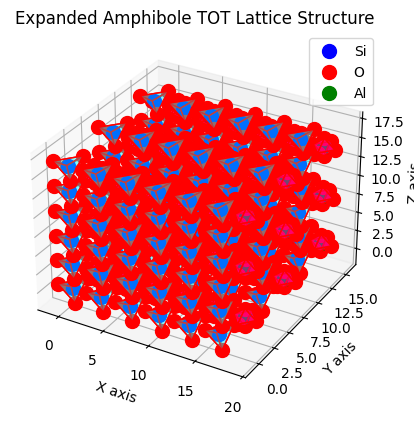

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def create_tetrahedron(center, bond_length):
    O_atoms = bond_length * np.array([
        [1, 1, 1],
        [-1, -1, 1],
        [-1, 1, -1],
        [1, -1, -1]
    ]) / np.sqrt(3) + center
    return center, O_atoms

def create_octahedron(center, bond_length):
    O_atoms = bond_length * np.array([
        [1, 0, 0],
        [-1, 0, 0],
        [0, 1, 0],
        [0, -1, 0],
        [0, 0, 1],
        [0, 0, -1]
    ]) / np.sqrt(2) + center
    return center, O_atoms

def plot_tetrahedron(ax, Si, O):
    ax.scatter(*Si, color='blue', s=100, label='Si' if 'Si' not in ax.get_legend_handles_labels()[1] else "")
    for atom in O:
        ax.scatter(*atom, color='red', s=100, label='O' if 'O' not in ax.get_legend_handles_labels()[1] else "")
        ax.plot([Si[0], atom[0]], [Si[1], atom[1]], [Si[2], atom[2]], color='gray')
    verts = [[O[0], O[1], O[2]], [O[0], O[1], O[3]], [O[0], O[2], O[3]], [O[1], O[2], O[3]]]
    ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.25))

def plot_octahedron(ax, Al, O):
    ax.scatter(*Al, color='green', s=100, label='Al' if 'Al' not in ax.get_legend_handles_labels()[1] else "")
    for atom in O:
        ax.scatter(*atom, color='red', s=100, label='O' if 'O' not in ax.get_legend_handles_labels()[1] else "")
        ax.plot([Al[0], atom[0]], [Al[1], atom[1]], [Al[2], atom[2]], color='gray')
    verts = [
        [O[0], O[2], O[4]], [O[0], O[2], O[5]], [O[0], O[3], O[4]], [O[0], O[3], O[5]],
        [O[1], O[2], O[4]], [O[1], O[2], O[5]], [O[1], O[3], O[4]], [O[1], O[3], O[5]]
    ]
    ax.add_collection3d(Poly3DCollection(verts, facecolors='magenta', linewidths=1, edgecolors='r', alpha=0.25))

def plot_TOT_lattice():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    bond_length = 1.61

    # Loop over a 3x3x3 grid to create the expanded structure
    for i in range(3):
        for j in range(3):
            for k in range(3):
                # Calculate the shift for each cell in the grid
                shift = np.array([i, j, k]) * 4 * bond_length

                # Define positions for tetrahedra and octahedra in the current cell
                tetra_centers = [
                    np.array([0, 0, 0]), np.array([0, 0, 2 * bond_length]),
                    np.array([2 * bond_length, 0, 0]), np.array([2 * bond_length, 0, 2 * bond_length])
                ] + shift
                octa_centers = [
                    np.array([bond_length, bond_length, bond_length]), np.array([3 * bond_length, bond_length, bond_length])
                ] + shift

                # Plot tetrahedra
                for center in tetra_centers:
                    Si, O = create_tetrahedron(center, bond_length)
                    plot_tetrahedron(ax, Si, O)

                # Plot octahedra
                for center in octa_centers:
                    Al, O = create_octahedron(center, bond_length)
                    plot_octahedron(ax, Al, O)

    # Labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('Expanded Amphibole TOT Lattice Structure')

    plt.legend()
    plt.show()

plot_TOT_lattice()


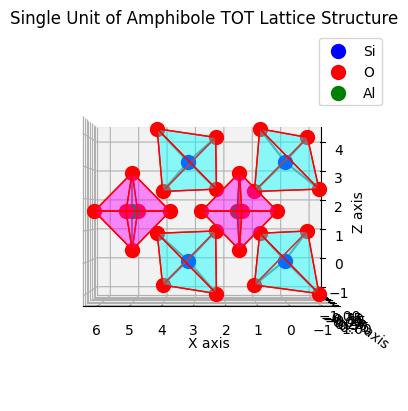

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def create_tetrahedron(center, bond_length):
    O_atoms = bond_length * np.array([
        [1, 1, 1],
        [-1, -1, 1],
        [-1, 1, -1],
        [1, -1, -1]
    ]) / np.sqrt(3) + center
    return center, O_atoms

def create_octahedron(center, bond_length):
    O_atoms = bond_length * np.array([
        [1, 0, 0],
        [-1, 0, 0],
        [0, 1, 0],
        [0, -1, 0],
        [0, 0, 1],
        [0, 0, -1]
    ]) / np.sqrt(2) + center
    return center, O_atoms

def plot_tetrahedron(ax, Si, O):
    ax.scatter(*Si, color='blue', s=100, label='Si' if 'Si' not in ax.get_legend_handles_labels()[1] else "")
    for atom in O:
        ax.scatter(*atom, color='red', s=100, label='O' if 'O' not in ax.get_legend_handles_labels()[1] else "")
        ax.plot([Si[0], atom[0]], [Si[1], atom[1]], [Si[2], atom[2]], color='gray')
    verts = [[O[0], O[1], O[2]], [O[0], O[1], O[3]], [O[0], O[2], O[3]], [O[1], O[2], O[3]]]
    ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.25))

def plot_octahedron(ax, Al, O):
    ax.scatter(*Al, color='green', s=100, label='Al' if 'Al' not in ax.get_legend_handles_labels()[1] else "")
    for atom in O:
        ax.scatter(*atom, color='red', s=100, label='O' if 'O' not in ax.get_legend_handles_labels()[1] else "")
        ax.plot([Al[0], atom[0]], [Al[1], atom[1]], [Al[2], atom[2]], color='gray')
    verts = [
        [O[0], O[2], O[4]], [O[0], O[2], O[5]], [O[0], O[3], O[4]], [O[0], O[3], O[5]],
        [O[1], O[2], O[4]], [O[1], O[2], O[5]], [O[1], O[3], O[4]], [O[1], O[3], O[5]]
    ]
    ax.add_collection3d(Poly3DCollection(verts, facecolors='magenta', linewidths=1, edgecolors='r', alpha=0.25))

def plot_TOT_lattice():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    bond_length = 1.61

    # Define positions for tetrahedra and octahedra in the unit cell
    tetra_centers = [
        np.array([0, 0, 0]), np.array([0, 0, 2 * bond_length]),
        np.array([2 * bond_length, 0, 0]), np.array([2 * bond_length, 0, 2 * bond_length])
    ]
    octa_centers = [
        np.array([bond_length, bond_length, bond_length]), np.array([3 * bond_length, bond_length, bond_length])
    ]

    # Plot tetrahedra
    for center in tetra_centers:
        Si, O = create_tetrahedron(center, bond_length)
        plot_tetrahedron(ax, Si, O)

    # Plot octahedra
    for center in octa_centers:
        Al, O = create_octahedron(center, bond_length)
        plot_octahedron(ax, Al, O)

    # Labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('Single Unit of Amphibole TOT Lattice Structure')

    # Set view angle to look down the y-axis
    ax.view_init(elev=0, azim=90)
    ax.set_ylim([-1, 1])  # Centering around y = 0 to y = 1

    plt.legend()
    plt.show()

plot_TOT_lattice()


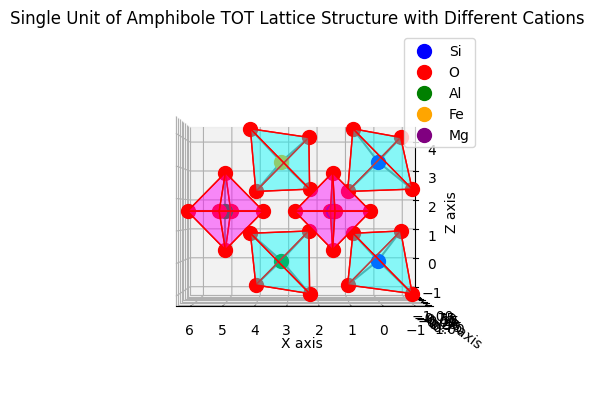

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def create_tetrahedron(center, bond_length, cation='Si'):
    O_atoms = bond_length * np.array([
        [1, 1, 1],
        [-1, -1, 1],
        [-1, 1, -1],
        [1, -1, -1]
    ]) / np.sqrt(3) + center
    return center, O_atoms, cation

def create_octahedron(center, bond_length, cation='Al'):
    O_atoms = bond_length * np.array([
        [1, 0, 0],
        [-1, 0, 0],
        [0, 1, 0],
        [0, -1, 0],
        [0, 0, 1],
        [0, 0, -1]
    ]) / np.sqrt(2) + center
    return center, O_atoms, cation

def plot_tetrahedron(ax, center, O_atoms, cation):
    cation_colors = {'Si': 'blue', 'Al': 'green', 'Fe': 'orange'}  # Add other cations as needed
    ax.scatter(*center, color=cation_colors.get(cation, 'blue'), s=100, label=cation if cation not in ax.get_legend_handles_labels()[1] else "")
    for atom in O_atoms:
        ax.scatter(*atom, color='red', s=100, label='O' if 'O' not in ax.get_legend_handles_labels()[1] else "")
        ax.plot([center[0], atom[0]], [center[1], atom[1]], [center[2], atom[2]], color='gray')
    verts = [[O_atoms[0], O_atoms[1], O_atoms[2]], [O_atoms[0], O_atoms[1], O_atoms[3]], [O_atoms[0], O_atoms[2], O_atoms[3]], [O_atoms[1], O_atoms[2], O_atoms[3]]]
    ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.25))

def plot_octahedron(ax, center, O_atoms, cation):
    cation_colors = {'Al': 'green', 'Mg': 'purple', 'Fe': 'orange'}  # Add other cations as needed
    ax.scatter(*center, color=cation_colors.get(cation, 'green'), s=100, label=cation if cation not in ax.get_legend_handles_labels()[1] else "")
    for atom in O_atoms:
        ax.scatter(*atom, color='red', s=100, label='O' if 'O' not in ax.get_legend_handles_labels()[1] else "")
        ax.plot([center[0], atom[0]], [center[1], atom[1]], [center[2], atom[2]], color='gray')
    verts = [
        [O_atoms[0], O_atoms[2], O_atoms[4]], [O_atoms[0], O_atoms[2], O_atoms[5]], [O_atoms[0], O_atoms[3], O_atoms[4]], [O_atoms[0], O_atoms[3], O_atoms[5]],
        [O_atoms[1], O_atoms[2], O_atoms[4]], [O_atoms[1], O_atoms[2], O_atoms[5]], [O_atoms[1], O_atoms[3], O_atoms[4]], [O_atoms[1], O_atoms[3], O_atoms[5]]
    ]
    ax.add_collection3d(Poly3DCollection(verts, facecolors='magenta', linewidths=1, edgecolors='r', alpha=0.25))

def plot_TOT_lattice():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    bond_length = 1.61

    # Define positions and cations for tetrahedra and octahedra in the unit cell
    tetra_data = [
        {'center': np.array([0, 0, 0]), 'cation': 'Si'},
        {'center': np.array([0, 0, 2 * bond_length]), 'cation': 'Si'},
        {'center': np.array([2 * bond_length, 0, 0]), 'cation': 'Al'},
        {'center': np.array([2 * bond_length, 0, 2 * bond_length]), 'cation': 'Fe'}
    ]
    octa_data = [
        {'center': np.array([bond_length, bond_length, bond_length]), 'cation': 'Mg'},
        {'center': np.array([3 * bond_length, bond_length, bond_length]), 'cation': 'Al'}
    ]

    # Plot tetrahedra
    for data in tetra_data:
        center, O_atoms, cation = create_tetrahedron(data['center'], bond_length, data['cation'])
        plot_tetrahedron(ax, center, O_atoms, cation)

    # Plot octahedra
    for data in octa_data:
        center, O_atoms, cation = create_octahedron(data['center'], bond_length, data['cation'])
        plot_octahedron(ax, center, O_atoms, cation)

    # Labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('Single Unit of Amphibole TOT Lattice Structure with Different Cations')

    # Set view angle to look down the y-axis
    ax.view_init(elev=0, azim=90)
    ax.set_ylim([-1, 1])  # Centering around y = 0 to y = 1

    plt.legend()
    plt.show()

plot_TOT_lattice()
